In [68]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [69]:
data = pd.read_csv('election_train.csv')

In [70]:
data.head(20)

,Year,State,County,Office,Party,Votes
0,2018,AZ,Apache County,US Senator,Democratic,16298
1,2018,AZ,Apache County,US Senator,Republican,7810
2,2018,AZ,Cochise County,US Senator,Democratic,17383
3,2018,AZ,Cochise County,US Senator,Republican,26929
4,2018,AZ,Coconino County,US Senator,Democratic,34240
5,2018,AZ,Coconino County,US Senator,Republican,19249
6,2018,AZ,Gila County,US Senator,Democratic,7643
7,2018,AZ,Gila County,US Senator,Republican,12180
8,2018,AZ,Graham County,US Senator,Democratic,3368
9,2018,AZ,Graham County,US Senator,Republican,6870


In [71]:
election_data = pd.pivot_table(data, index=['State', 'Year', 'Office','County'], columns='Party', values='Votes').reset_index()

In [72]:
demographics_data = pd.read_csv('demographics_train.csv')

In [73]:
demographics_data.head(20)

,State,County,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,Wisconsin,La Crosse,55063,117538,0,90.537528,1.214075,1.724549,2.976059,51.171536,43.241335,14.702479,51477,4.796952,5.474767,67.529757,16.827753
1,Virginia,Alleghany,51005,15919,12705,91.940449,5.207614,1.432251,1.300333,51.077329,31.660280,23.902255,45538,4.560986,15.537543,83.711604,52.393846
2,Indiana,Fountain,18045,16741,12750,95.705155,0.400215,2.359477,1.547100,49.770026,35.899887,18.941521,45924,7.978789,12.032155,85.538940,65.951276
3,Ohio,Geauga,39055,94020,0,95.837056,1.256116,1.294405,2.578175,50.678579,36.281642,18.028079,74165,4.036902,8.928599,62.730824,63.968990
4,Wisconsin,Jackson,55053,20566,15835,86.662453,1.983857,3.082758,1.376058,46.649810,36.292911,17.587280,49608,5.569698,11.792912,86.129256,72.238251
5,Texas,Baylor,48023,3639,0,86.644683,1.841165,8.353943,2.473207,51.662545,30.090684,24.402308,34382,1.377410,13.066667,73.409524,100.000000
6,Nebraska,Madison,31119,35125,24885,81.249822,1.155872,14.217794,6.784342,50.448399,41.432028,15.404982,48673,3.094085,11.678672,80.345221,27.904576
7,Hawaii,Hawaii,15001,193680,0,30.401694,0.547811,12.405514,11.003717,50.143019,36.008881,17.580545,53936,7.437632,8.362326,72.408979,37.990804
8,Tennessee,Henry,47079,32291,25285,87.662197,8.599919,2.201852,1.560806,51.441578,33.238364,21.476572,38378,7.912277,15.710841,85.305261,66.848129
9,Michigan,Oceana,26127,26152,18930,82.486999,1.131845,14.419547,5.578923,49.395840,36.643469,19.088406,41952,8.275556,14.335429,82.947912,89.890854


In [74]:
state_map = pd.read_csv('state_map.csv')
state_map.head()

,State,Code
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [75]:
dict = {}
for element in state_map.values:
    dict[element[1]] = element[0]

In [76]:
election_data.replace({"State": dict},inplace=True)

In [77]:
election_data['County'] = election_data.County.str.replace(' County','').str.lower()
demographics_data['County'] = demographics_data['County'].str.lower()

In [78]:
merge_dataframe = pd.merge(election_data, demographics_data, how="inner", on=['County','State'])
merge_dataframe

,State,Year,Office,County,Democratic,Republican,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino",...,Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,Arizona,2018,US Senator,apache,16298.0,7810.0,4001,72346,0,18.571863,...,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076
1,Arizona,2018,US Senator,cochise,17383.0,26929.0,4003,128177,92915,56.299492,...,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067
2,Arizona,2018,US Senator,coconino,34240.0,19249.0,4005,138064,104265,54.619597,...,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066
3,Arizona,2018,US Senator,gila,7643.0,12180.0,4007,53179,0,63.222325,...,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000
4,Arizona,2018,US Senator,graham,3368.0,6870.0,4009,37529,0,51.461536,...,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Wyoming,2018,US Senator,platte,801.0,2850.0,56031,8740,6830,89.359268,...,7.814645,2.780320,47.711670,32.700229,22.013730,41051,3.901047,9.675889,80.300395,58.647744
1196,Wyoming,2018,US Senator,sublette,668.0,2653.0,56035,10032,0,91.646730,...,7.814992,2.053429,46.949761,36.393541,13.337321,76004,2.786971,4.658830,75.645069,100.000000
1197,Wyoming,2018,US Senator,sweetwater,3943.0,8577.0,56037,44812,30565,79.815674,...,15.859591,5.509685,47.824244,44.153352,9.417120,68233,5.072255,9.314606,78.628507,10.916313
1198,Wyoming,2018,US Senator,uinta,1371.0,4713.0,56041,20893,14355,87.718375,...,8.959939,3.986981,49.327526,43.205858,10.678218,53323,6.390755,10.361224,81.793082,43.095937


In [79]:
merge_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   State                                  1200 non-null   object 
 1   Year                                   1200 non-null   int64  
 2   Office                                 1200 non-null   object 
 3   County                                 1200 non-null   object 
 4   Democratic                             1197 non-null   float64
 5   Republican                             1198 non-null   float64
 6   FIPS                                   1200 non-null   int64  
 7   Total Population                       1200 non-null   int64  
 8   Citizen Voting-Age Population          1200 non-null   int64  
 9   Percent White, not Hispanic or Latino  1200 non-null   float64
 10  Percent Black, not Hispanic or Latino  1200 non-null   float64
 11  Perc

#### How mant variables does the dataset have?
The dataset has 21 variables.
<br>
#### What is the type of these variables?
The type of these variables are objectm int64 and float64.

#### Are there any irrelevant or redundant variables?
Yes, there are irrelevant or redundant variables in the dataset.
Year has a value of only 2018, and no other value. Hence, this is an irrelevant/redundant variable.

#### How will you deal with these variables?
We should delete the Year and Office column and insert the year 2018 and US Senator in the table header.

In [80]:
merge_dataframe.isnull().sum()

State                                    0
Year                                     0
Office                                   0
County                                   0
Democratic                               3
Republican                               2
FIPS                                     0
Total Population                         0
Citizen Voting-Age Population            0
Percent White, not Hispanic or Latino    0
Percent Black, not Hispanic or Latino    0
Percent Hispanic or Latino               0
Percent Foreign Born                     0
Percent Female                           0
Percent Age 29 and Under                 0
Percent Age 65 and Older                 0
Median Household Income                  0
Percent Unemployed                       0
Percent Less than High School Degree     0
Percent Less than Bachelor's Degree      0
Percent Rural                            0
dtype: int64

In [81]:
merge_dataframe[merge_dataframe['Citizen Voting-Age Population'] == 0]

,State,Year,Office,County,Democratic,Republican,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino",...,Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,Arizona,2018,US Senator,apache,16298.0,7810.0,4001,72346,0,18.571863,...,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076
3,Arizona,2018,US Senator,gila,7643.0,12180.0,4007,53179,0,63.222325,...,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000
4,Arizona,2018,US Senator,graham,3368.0,6870.0,4009,37529,0,51.461536,...,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399
7,Arizona,2018,US Senator,mohave,19214.0,50209.0,4015,203629,0,78.252606,...,15.708470,6.969047,49.676618,30.485835,26.858650,39856,11.680953,16.145850,88.121178,22.963644
9,Arizona,2018,US Senator,pima,221242.0,160550.0,4019,1003338,0,53.271579,...,36.105978,12.903428,50.807405,40.087388,17.801778,46764,9.214114,12.252238,69.199391,7.523491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,Wyoming,2018,US Senator,converse,834.0,3959.0,56009,14223,0,88.849047,...,7.691767,2.706883,49.933207,38.515081,13.668003,66737,5.282284,9.758393,84.468152,55.360370
1190,Wyoming,2018,US Senator,goshen,1020.0,3658.0,56015,13546,0,86.409272,...,10.519711,2.724051,47.091392,35.914661,20.389783,44883,6.918819,8.390574,77.036880,45.995924
1192,Wyoming,2018,US Senator,lincoln,1152.0,5846.0,56023,18543,0,92.600982,...,4.416761,2.151755,48.773122,38.715418,14.382786,64579,5.618095,6.949996,79.631291,82.729482
1196,Wyoming,2018,US Senator,sublette,668.0,2653.0,56035,10032,0,91.646730,...,7.814992,2.053429,46.949761,36.393541,13.337321,76004,2.786971,4.658830,75.645069,100.000000


<br>
There are missing values in Democratic and Republican columns. Also, Citizen Voting-Age Population has values mentioned as 0.

We will remove the Citizen Voting-Age Population since it has over 50% of data with the value 0.

In [82]:
merge_dataframe.drop(columns=['Citizen Voting-Age Population', 'Year', 'Office'],inplace=True)

In [83]:
merge_dataframe

,State,County,Democratic,Republican,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,Arizona,apache,16298.0,7810.0,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076
1,Arizona,cochise,17383.0,26929.0,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067
2,Arizona,coconino,34240.0,19249.0,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066
3,Arizona,gila,7643.0,12180.0,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000
4,Arizona,graham,3368.0,6870.0,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Wyoming,platte,801.0,2850.0,56031,8740,89.359268,0.057208,7.814645,2.780320,47.711670,32.700229,22.013730,41051,3.901047,9.675889,80.300395,58.647744
1196,Wyoming,sublette,668.0,2653.0,56035,10032,91.646730,0.000000,7.814992,2.053429,46.949761,36.393541,13.337321,76004,2.786971,4.658830,75.645069,100.000000
1197,Wyoming,sweetwater,3943.0,8577.0,56037,44812,79.815674,0.865840,15.859591,5.509685,47.824244,44.153352,9.417120,68233,5.072255,9.314606,78.628507,10.916313
1198,Wyoming,uinta,1371.0,4713.0,56041,20893,87.718375,0.186665,8.959939,3.986981,49.327526,43.205858,10.678218,53323,6.390755,10.361224,81.793082,43.095937


In [86]:
democratic_total = merge_dataframe['Democratic'].sum(axis = 0, skipna = True)
republican_total = merge_dataframe['Republican'].sum(axis = 0, skipna = True)
total_population = merge_dataframe['Total Population'].sum(axis = 0, skipna = True)

percent_votes = (democratic_total + republican_total) / total_population * 100
percent_votes

37.58904322040173

In [87]:
republican_data = merge_dataframe[merge_dataframe['Republican'].isnull()]
for row in republican_data.values:
    print(int((percent_votes * row[5]/100)-row[2]))

9482
2720


In [88]:
merge_dataframe[merge_dataframe['Republican'].isnull()]

,State,County,Democratic,Republican,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
750,Texas,bee,2811.0,NaN,48025,32706,32.660674,7.989360,57.909864,4.344769,39.579894,40.448236,11.514707,44005,6.065048,28.602944,91.094503,42.977308
1114,Wisconsin,lafayette,3592.0,NaN,55065,16793,94.771631,0.339427,3.507414,2.286667,49.199071,37.688323,16.709343,53038,2.998885,10.123457,82.336861,100.000000


In [89]:
merge_dataframe.iloc[750,3] = 9482
merge_dataframe.iloc[1114,3] = 2720

In [90]:
merge_dataframe[merge_dataframe['Democratic'].isnull()]

,State,County,Democratic,Republican,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
425,Nebraska,lancaster,NaN,49449.0,31109,301707,82.659667,3.783472,6.531834,7.523856,49.891782,45.457016,12.175057,53730,4.372984,6.636272,62.697684,8.253126
714,Tennessee,meigs,NaN,2694.0,47121,11804,94.713656,1.330058,1.465605,1.067435,50.626906,33.361572,19.662826,35209,12.544170,21.141176,91.176471,100.000000
865,Texas,menard,NaN,632.0,48327,2163,56.310680,1.248266,39.389736,4.299584,46.833102,36.430883,22.468793,37917,8.360836,21.113990,84.909326,100.000000


In [92]:
democratic_data = merge_dataframe[merge_dataframe['Democratic'].isnull()]
for row in democratic_data.values:
    print(int((percent_votes * row[5]/100)-row[3]))

63959
1743
181


In [102]:
merge_dataframe.iloc[425,2] = 63959
merge_dataframe.iloc[714,2] = 1743
merge_dataframe.iloc[865,2] = 181

In [103]:
#if democratic > republican, then 1, else 0
# merge_dataframe['Party'] = merge_dataframe['Democratic'] - merge_dataframe['Republican']

def compare_values(row):
    a = row[0]
    b = row[1]

    # One of the rules
    if a > b:
        return 1
    else:
        return 0

    return None

merge_dataframe["Party"] = merge_dataframe[["Democratic", "Republican"]].apply(compare_values, axis=1)

In [104]:
merge_dataframe

,State,County,Democratic,Republican,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Party
0,Arizona,apache,16298.0,7810.0,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,1
1,Arizona,cochise,17383.0,26929.0,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,0
2,Arizona,coconino,34240.0,19249.0,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,1
3,Arizona,gila,7643.0,12180.0,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,0
4,Arizona,graham,3368.0,6870.0,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Wyoming,platte,801.0,2850.0,56031,8740,89.359268,0.057208,7.814645,2.780320,47.711670,32.700229,22.013730,41051,3.901047,9.675889,80.300395,58.647744,0
1196,Wyoming,sublette,668.0,2653.0,56035,10032,91.646730,0.000000,7.814992,2.053429,46.949761,36.393541,13.337321,76004,2.786971,4.658830,75.645069,100.000000,0
1197,Wyoming,sweetwater,3943.0,8577.0,56037,44812,79.815674,0.865840,15.859591,5.509685,47.824244,44.153352,9.417120,68233,5.072255,9.314606,78.628507,10.916313,0
1198,Wyoming,uinta,1371.0,4713.0,56041,20893,87.718375,0.186665,8.959939,3.986981,49.327526,43.205858,10.678218,53323,6.390755,10.361224,81.793082,43.095937,0


In [105]:
#mean of median household income from Democratic and Republican County
democratic_household = merge_dataframe[merge_dataframe['Party'] == 1]
democratic_household['Median Household Income'].mean()
democratic_household

,State,County,Democratic,Republican,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Party
0,Arizona,apache,16298.0,7810.0,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,1
2,Arizona,coconino,34240.0,19249.0,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,1
6,Arizona,maricopa,732671.0,672505.0,4013,4088549,56.918114,5.013612,30.286833,14.729333,50.549278,41.886620,13.837843,55676,6.808454,13.051927,69.031137,2.363800,1
9,Arizona,pima,221242.0,160550.0,4019,1003338,53.271579,3.199719,36.105978,12.903428,50.807405,40.087388,17.801778,46764,9.214114,12.252238,69.199391,7.523491,1
10,Arizona,santa cruz,9241.0,3828.0,4023,46547,15.274883,0.199798,83.219112,32.644424,52.125808,43.300320,15.895761,38941,9.749896,25.206726,77.506775,26.883172,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,West Virginia,summers,2069.0,1868.0,54089,13325,91.639775,5.320826,1.696060,0.435272,53.696060,28.900563,21.275797,35620,10.729049,17.191498,85.219445,72.126086,1
1181,West Virginia,wayne,6395.0,5954.0,54099,41237,97.524068,0.329801,0.613527,0.603827,51.378616,34.481170,18.289400,38311,9.504391,20.628495,87.121342,65.186789,1
1182,West Virginia,wetzel,2518.0,2135.0,54103,15997,97.574545,0.431331,0.481340,0.443833,50.997062,33.168719,21.278990,39446,8.472337,16.947084,89.251155,53.856359,1
1183,West Virginia,wood,14189.0,13696.0,54107,86262,95.478890,1.123322,1.032900,1.001600,51.756277,34.726763,18.559737,43944,7.625458,10.370080,79.738786,26.774461,1


In [106]:
republican_household = merge_dataframe[merge_dataframe['Party'] == 0]
republican_household['Median Household Income'].mean()
republican_household

,State,County,Democratic,Republican,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Party
1,Arizona,cochise,17383.0,26929.0,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,0
3,Arizona,gila,7643.0,12180.0,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,0
4,Arizona,graham,3368.0,6870.0,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,0
5,Arizona,la paz,1609.0,3265.0,4012,20304,58.884949,0.379236,26.182033,11.372143,48.946020,28.073286,36.056935,36321,10.599013,24.842215,89.563407,56.327786,0
7,Arizona,mohave,19214.0,50209.0,4015,203629,78.252606,0.951731,15.708470,6.969047,49.676618,30.485835,26.858650,39856,11.680953,16.145850,88.121178,22.963644,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Wyoming,platte,801.0,2850.0,56031,8740,89.359268,0.057208,7.814645,2.780320,47.711670,32.700229,22.013730,41051,3.901047,9.675889,80.300395,58.647744,0
1196,Wyoming,sublette,668.0,2653.0,56035,10032,91.646730,0.000000,7.814992,2.053429,46.949761,36.393541,13.337321,76004,2.786971,4.658830,75.645069,100.000000,0
1197,Wyoming,sweetwater,3943.0,8577.0,56037,44812,79.815674,0.865840,15.859591,5.509685,47.824244,44.153352,9.417120,68233,5.072255,9.314606,78.628507,10.916313,0
1198,Wyoming,uinta,1371.0,4713.0,56041,20893,87.718375,0.186665,8.959939,3.986981,49.327526,43.205858,10.678218,53323,6.390755,10.361224,81.793082,43.095937,0


#### Compute the mean median household income for Democratic counties and Republican counties. Which one is higher?
Democratic Household Income is higher

#### Perform a hypothesis test to determine whether this difference is statistically significant at the 𝜶 = 𝟎. 𝟎𝟓 significance level. What is the result of the test? What conclusion do you make from this result?

In [107]:
#mean of population from Democratic and Republican County
democratic_population = merge_dataframe[merge_dataframe['Party'] == 1]
democratic_population['Total Population'].mean()

300131.35474006116

In [108]:
#mean of population from Democratic and Republican County
republic_population = merge_dataframe[merge_dataframe['Party'] == 0]
republic_population['Total Population'].mean()


53733.03321878579

#### Compute the mean population for Democratic counties and Republican counties. Which one is higher? 
The population mean is higher for Republican Counties.

#### Perform a hypothesis test to determine whether this difference is statistically significant at the 𝜶 = 𝟎. 𝟎𝟓 significance level. What is the result of the test? What conclusion do you make from this result?

In [109]:
merge_dataframe

,State,County,Democratic,Republican,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Party
0,Arizona,apache,16298.0,7810.0,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,1
1,Arizona,cochise,17383.0,26929.0,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,0
2,Arizona,coconino,34240.0,19249.0,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,1
3,Arizona,gila,7643.0,12180.0,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,0
4,Arizona,graham,3368.0,6870.0,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Wyoming,platte,801.0,2850.0,56031,8740,89.359268,0.057208,7.814645,2.780320,47.711670,32.700229,22.013730,41051,3.901047,9.675889,80.300395,58.647744,0
1196,Wyoming,sublette,668.0,2653.0,56035,10032,91.646730,0.000000,7.814992,2.053429,46.949761,36.393541,13.337321,76004,2.786971,4.658830,75.645069,100.000000,0
1197,Wyoming,sweetwater,3943.0,8577.0,56037,44812,79.815674,0.865840,15.859591,5.509685,47.824244,44.153352,9.417120,68233,5.072255,9.314606,78.628507,10.916313,0
1198,Wyoming,uinta,1371.0,4713.0,56041,20893,87.718375,0.186665,8.959939,3.986981,49.327526,43.205858,10.678218,53323,6.390755,10.361224,81.793082,43.095937,0


In [110]:
from scipy.stats import ttest_ind
import numpy as np


In [162]:
ttest,pval = ttest_ind(democratic_household['Median Household Income'], republican_household['Median Household Income'], equal_var=False)
pval=pval/2
print("p-value",pval)

p-value 2.5365053061329847e-08


In [112]:
#Since p-value is less than the significance value we have sufficient evidence to reject the null hypothesis.

In [113]:
ttest,pvall = ttest_ind(democratic_population['Total Population'], republic_population['Total Population'])
print("p-value",pvall)

p-value 8.14907891935172e-35


In [114]:
#Since p-value less than the significance value we have sufficient evidence to reject the null hypothesis.

In [119]:
merge_dataframe['Percent age 30 to 64'] = 100 - (merge_dataframe['Percent Age 29 and Under'] + merge_dataframe['Percent Age 65 and Older'])
merge_dataframe

,State,County,Democratic,Republican,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Party,Percent age 30 to 64
0,Arizona,apache,16298.0,7810.0,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,1,40.823266
1,Arizona,cochise,17383.0,26929.0,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,0,42.341450
2,Arizona,coconino,34240.0,19249.0,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,1,40.179917
3,Arizona,gila,7643.0,12180.0,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,0,41.364072
4,Arizona,graham,3368.0,6870.0,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,0,41.290735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Wyoming,platte,801.0,2850.0,56031,8740,89.359268,0.057208,7.814645,2.780320,47.711670,32.700229,22.013730,41051,3.901047,9.675889,80.300395,58.647744,0,45.286041
1196,Wyoming,sublette,668.0,2653.0,56035,10032,91.646730,0.000000,7.814992,2.053429,46.949761,36.393541,13.337321,76004,2.786971,4.658830,75.645069,100.000000,0,50.269139
1197,Wyoming,sweetwater,3943.0,8577.0,56037,44812,79.815674,0.865840,15.859591,5.509685,47.824244,44.153352,9.417120,68233,5.072255,9.314606,78.628507,10.916313,0,46.429528
1198,Wyoming,uinta,1371.0,4713.0,56041,20893,87.718375,0.186665,8.959939,3.986981,49.327526,43.205858,10.678218,53323,6.390755,10.361224,81.793082,43.095937,0,46.115924


In [121]:
merge_dataframe.groupby(by=['Party'])['Percent Age 29 and Under','Percent age 30 to 64','Percent Age 65 and Older'].describe()

<ipython-input-121-2588db823964>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merge_dataframe.groupby(by=['Party'])['Percent Age 29 and Under','Percent age 30 to 64','Percent Age 65 and Older'].describe()


Percent Age 29 and Under                                             \
                         count       mean       std        min        25%   
Party                                                                       
0                        873.0  36.008266  5.175583  11.842105  32.998088   
1                        327.0  38.744364  6.244951  23.156452  34.507689   

                                       Percent age 30 to 64             ...  \
             50%        75%        max                count       mean  ...   
Party                                                                   ...   
0      35.847515  38.543228  58.749116                873.0  45.166719  ...   
1      38.074151  42.189832  67.367823                327.0  45.071529  ...   

                            Percent Age 65 and Older                       \
             75%        max                    count       mean       std   
Party                                                                       
0      46.984596  63.157895                    873.0  18.825015  4.733182   
1      47.447037  57.478906                    327.0  16.184107  4.275148   

                                                             
            min        25%        50%        75%        max  
Party                                                        
0      6.954387  15.781645  18.378754  21.116397  37.622759  
1      6.653188  13.096022  15.698087  18.803418  31.642106  

[2 rows x 24 columns]

In [151]:
import seaborn as sns

In [128]:
output_df = pd.melt(merge_dataframe, id_vars=['FIPS','Party'], value_vars=['Percent Age 29 and Under','Percent age 30 to 64','Percent Age 65 and Older'])

In [143]:
output_df[output_df.Party == 1]

,FIPS,Party,variable,value
0,4001,1,Percent Age 29 and Under,45.854643
2,4005,1,Percent Age 29 and Under,48.946141
6,4013,1,Percent Age 29 and Under,41.886620
9,4019,1,Percent Age 29 and Under,40.087388
10,4023,1,Percent Age 29 and Under,43.300320
...,...,...,...,...
3576,54089,1,Percent Age 65 and Older,21.275797
3581,54099,1,Percent Age 65 and Older,18.289400
3582,54103,1,Percent Age 65 and Older,21.278990
3583,54107,1,Percent Age 65 and Older,18.559737


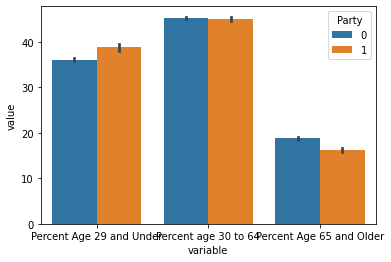

In [154]:
ax = sns.barplot(x ='variable', y='value', hue='Party', data=output_df)

In [156]:
gender_plot = merge_dataframe
gender_plot['Percent Male'] = 100 - merge_dataframe['Percent Female']
gender_plot

,State,County,Democratic,Republican,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,...,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Party,Percent age 30 to 64,Percent Male
0,Arizona,apache,16298.0,7810.0,4001,72346,18.571863,0.486551,5.947806,1.719515,...,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,1,40.823266,49.401487
1,Arizona,cochise,17383.0,26929.0,4003,128177,56.299492,3.714395,34.403208,11.458374,...,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,0,42.341450,50.930354
2,Arizona,coconino,34240.0,19249.0,4005,138064,54.619597,1.342855,13.711033,4.825298,...,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,1,40.179917,49.418386
3,Arizona,gila,7643.0,12180.0,4007,53179,63.222325,0.552850,18.548675,4.249798,...,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,0,41.364072,49.703830
4,Arizona,graham,3368.0,6870.0,4009,37529,51.461536,1.811932,32.097844,4.385942,...,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,0,41.290735,53.686482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Wyoming,platte,801.0,2850.0,56031,8740,89.359268,0.057208,7.814645,2.780320,...,32.700229,22.013730,41051,3.901047,9.675889,80.300395,58.647744,0,45.286041,52.288330
1196,Wyoming,sublette,668.0,2653.0,56035,10032,91.646730,0.000000,7.814992,2.053429,...,36.393541,13.337321,76004,2.786971,4.658830,75.645069,100.000000,0,50.269139,53.050239
1197,Wyoming,sweetwater,3943.0,8577.0,56037,44812,79.815674,0.865840,15.859591,5.509685,...,44.153352,9.417120,68233,5.072255,9.314606,78.628507,10.916313,0,46.429528,52.175756
1198,Wyoming,uinta,1371.0,4713.0,56041,20893,87.718375,0.186665,8.959939,3.986981,...,43.205858,10.678218,53323,6.390755,10.361224,81.793082,43.095937,0,46.115924,50.672474


In [158]:
gender_table = pd.melt(merge_dataframe, id_vars=['FIPS','Party'], value_vars=['Percent Male','Percent Female'])
gender_table

,FIPS,Party,variable,value
0,4001,1,Percent Male,49.401487
1,4003,0,Percent Male,50.930354
2,4005,1,Percent Male,49.418386
3,4007,0,Percent Male,49.703830
4,4009,0,Percent Male,53.686482
...,...,...,...,...
2395,56031,0,Percent Female,47.711670
2396,56035,0,Percent Female,46.949761
2397,56037,0,Percent Female,47.824244
2398,56041,0,Percent Female,49.327526


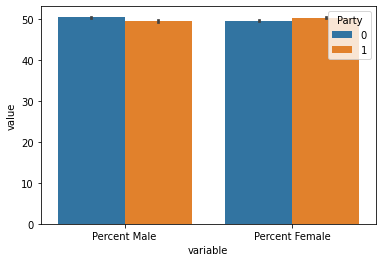

In [159]:
ax1 = sns.barplot(x ='variable', y='value', hue='Party', data=gender_table)